<a href="https://colab.research.google.com/github/TravisJRCain/FanDuel-Horse-Racing-Promo/blob/main/FanDuel_Horse_Racing_Promo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import various libraries for data cleaning, data wrangling and visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
from scipy import stats

In [2]:
# accountid = the id number of the user's account
# (activity) date = when the user was active on their account
# handle = amount wagered on bet
# grossrevenue = revenue generated per bet (the revenue generated for FanDuel or
  # the user?)
# last_12months_segment = activity level of user from the past 12 months
  # what does 'ka' and 'regnodep' mean?
  # 'ka' = VIP?
# target/cg = target or control group (i.e. who had the promo or not)
# bonus = bonus was awarded just once for each customer 
  # (i.e. VIP got $50, High Value $20, Medium Value $10 and Low Value $5)

In [3]:
# have to see if there was an increase in gross revenue from this promo
# - possible solutions to the hypothesis:
    # - compare gross revenue with target and control group
    # - see if there is a sizable difference between target/cg gross revenue
    # - compare bonuses with gross revenue
    # - etc.?

In [54]:
# importing data into notebook

df = pd.read_csv('/content/Business_case_Racing.csv')
df.head(10)

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
0,1230877,11/24/2019,1104750.0,-49000.0,high,Target,20
1,1230877,11/26/2019,596214.0,-30336.0,high,Target,20
2,1230877,11/13/2019,465250.0,-36000.0,high,Target,20
3,1230877,11/1/2019,437800.0,-20000.0,high,Target,20
4,1276799,2/24/2019,435275.0,69825.0,ka,Target,50
5,1230877,11/14/2019,355835.0,18335.0,high,Target,20
6,1230877,11/25/2019,347612.0,-22812.0,high,Target,20
7,1230877,10/14/2019,322050.0,19500.0,high,Target,20
8,1230877,10/31/2019,238785.0,-36481.0,high,Target,20
9,1368045,12/1/2019,172952.0,-5329.5,high,Target,20


In [5]:
# looking at various columns within dataframe

In [6]:
df['accountid'].value_counts()

1171041    351
1165513    337
1187561    333
1217510    308
1164847    289
          ... 
1303065      1
1284606      1
1275052      1
1427956      1
1300543      1
Name: accountid, Length: 699, dtype: int64

In [7]:
df['Target/CG'].describe()

count      12181
unique         2
top       Target
freq        9845
Name: Target/CG, dtype: object

In [8]:
df['Target/CG'].value_counts()

Target           9845
Control Group    2336
Name: Target/CG, dtype: int64

In [9]:
df['bonus'].value_counts()

5     4330
10    3402
20    2866
50    1583
Name: bonus, dtype: int64

In [10]:
df['date'].describe()

count         12181
unique          382
top       1/11/2020
freq             56
Name: date, dtype: object

In [14]:
df['handle'].value_counts()

0.00       1285
10.00        44
5.00         39
0.10         26
20.00        21
           ... 
1675.00       1
427.75        1
120.30        1
83.49         1
6400.00       1
Name: handle, Length: 8143, dtype: int64

In [15]:
df['last_12months_segment'].value_counts()

low         3899
medium      3402
high        2866
ka          1583
regnodep     404
no bet        27
Name: last_12months_segment, dtype: int64

In [32]:
# changing date to go from year, month, day

df['date'] = pd.to_datetime(df['date'])

In [33]:
print(min(df['date']))
print(max(df['date']))

2019-01-21 00:00:00
2020-02-06 00:00:00


In [8]:
df.head()

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
0,1230877,2019-11-24,1104750.0,-49000.0,high,Target,20
1,1230877,2019-11-26,596214.0,-30336.0,high,Target,20
2,1230877,2019-11-13,465250.0,-36000.0,high,Target,20
3,1230877,2019-11-01,437800.0,-20000.0,high,Target,20
4,1276799,2019-02-24,435275.0,69825.0,ka,Target,50


In [16]:
# create a function where inputted account ID spits out gross revenue
# also spits out a visualization to display gross revenue for specific account ID
# also says if user was a target or part of the control group

In [171]:
# input account ID, displays gross revenue for account ID

def id_revenue():
  inputid = input('Please input Account ID: ')
  try:
    return df.loc[int(inputid), 'grossrevenue']
  except:
    return 'No ID found'

df.set_index('accountid', inplace=True)

In [172]:
# example of function running properly

id_revenue()

Please input Account ID: 1276799


accountid
1276799    69825.0
1276799      436.0
1276799    -2243.0
1276799    27287.0
1276799    -1325.0
Name: grossrevenue, dtype: float64

In [9]:
# now, let's see what the gross revenue as a whole was

total_gross_revenue = df['grossrevenue'].sum()
print(total_gross_revenue)
print('----------')
print(df['grossrevenue'].mean())

633443.34
----------
52.002572859370936


In [21]:
# quick assessment from above: without diving into the data too much, 
# it appears the promo was a major success! 
# On average, FanDuel increased it's revenue by $52 per user!

In [22]:
# Machine Learning algorithms w/ visualizations
# We can figure out what factors had the biggest impact on positive gross revenue

In [8]:
df.head(10)

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
0,1230877,11/24/2019,1104750.0,-49000.0,high,Target,20
1,1230877,11/26/2019,596214.0,-30336.0,high,Target,20
2,1230877,11/13/2019,465250.0,-36000.0,high,Target,20
3,1230877,11/1/2019,437800.0,-20000.0,high,Target,20
4,1276799,2/24/2019,435275.0,69825.0,ka,Target,50
5,1230877,11/14/2019,355835.0,18335.0,high,Target,20
6,1230877,11/25/2019,347612.0,-22812.0,high,Target,20
7,1230877,10/14/2019,322050.0,19500.0,high,Target,20
8,1230877,10/31/2019,238785.0,-36481.0,high,Target,20
9,1368045,12/1/2019,172952.0,-5329.5,high,Target,20


In [4]:
def confidence_interval(df, confidence=0.95):
  data = np.array(df)
  mean = np.mean(df)
  n = len(df)
  s = df.std(ddof=1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

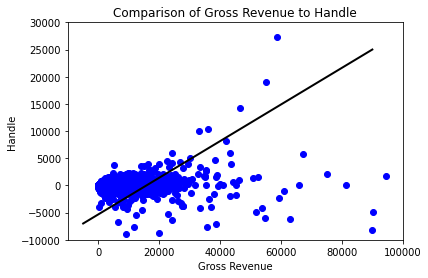

In [20]:
# try line charts / scatterplot visualizations

# gross_revenue_data = df['grossrevenue']

# CI = confidence_interval(gross_revenue_data)

plt.scatter(df['handle'], df['grossrevenue'], color='b')
plt.title('Comparison of Gross Revenue to Handle')
plt.xlim([-10000,100000])
plt.ylim([-10000,30000])
plt.xlabel('Gross Revenue')
plt.ylabel('Handle')
plt.plot([-5000,90000], [-7000,25000], color = 'black', linewidth = 2)
plt.show();

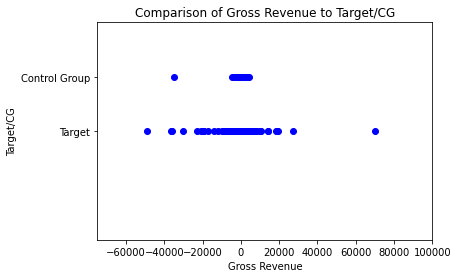

In [23]:
plt.scatter(df['grossrevenue'], df['Target/CG'], color='b')
plt.title('Comparison of Gross Revenue to Target/CG')
plt.xlim([-75000,100000])
plt.ylim([-2,2])
plt.xlabel('Gross Revenue')
plt.ylabel('Target/CG')
plt.show();

In [25]:
# charting the sum of gross revenue from target and cg

In [62]:
# create a separate data set with the sum of gross revenue from target
# and control group respectively

target_gross_revenue_sum = df.loc[df['Target/CG'] == 'Target']

In [63]:
# make sure target is the only variable in column
target_gross_revenue_sum['Target/CG'].value_counts()

Target    9845
Name: Target/CG, dtype: int64

In [64]:
# target is only variable, let's now only keep gross revenue and target

target_gross_revenue_sum = target_gross_revenue_sum[['Target/CG', 'grossrevenue']]

In [65]:
# now we have all the target and gross revenue!

target_gross_revenue_sum.head()

,Target/CG,grossrevenue
0,Target,-49000.0
1,Target,-30336.0
2,Target,-36000.0
3,Target,-20000.0
4,Target,69825.0


In [72]:
# let's do the same for control group now

cg_gross_revenue_sum = df.loc[df['Target/CG'] == 'Control Group']

In [76]:
# make sure control group is the only variable in column

cg_gross_revenue_sum['Target/CG'].value_counts()

Control Group    2336
Name: Target/CG, dtype: int64

In [74]:
# target is only variable, let's now only keep gross revenue and target

cg_gross_revenue_sum = cg_gross_revenue_sum[['Target/CG', 'grossrevenue']]

In [75]:
# now we have all the control group and gross revenue!

cg_gross_revenue_sum.head()

,Target/CG,grossrevenue
46,Control Group,974.32
48,Control Group,-1848.51
61,Control Group,-1490.88
67,Control Group,2759.13
68,Control Group,167.50


In [92]:
# merge the two datasets together

from functools import reduce

df_merge = [target_gross_revenue_sum, cg_gross_revenue_sum]

df_merged = reduce(lambda left,right: pd.merge(left,right,
                                               how='outer'), df_merge)
df_merged

,Target/CG,grossrevenue
0,Target,-49000.00
1,Target,-30336.00
2,Target,-36000.00
3,Target,-20000.00
4,Target,69825.00
...,...,...
12176,Control Group,0.05
12177,Control Group,0.05
12178,Control Group,0.02
12179,Control Group,0.02


In [93]:
df_merged['Target/CG'].value_counts()

Target           9845
Control Group    2336
Name: Target/CG, dtype: int64

In [95]:
target_sum = df_merged.loc[df_merged['Target/CG'] == 'Target'] 

In [96]:
# make sure only target is obtained

target_sum['Target/CG'].value_counts()

Target    9845
Name: Target/CG, dtype: int64

In [97]:
total_target = target_sum['grossrevenue'].sum()

In [98]:
# our total of gross revenue from target seen below

total_target

522682.02999999997

In [99]:
cg_sum = df_merged.loc[df_merged['Target/CG'] == 'Control Group'] 

In [100]:
cg_sum['Target/CG'].value_counts()

Control Group    2336
Name: Target/CG, dtype: int64

In [101]:
total_cg = cg_sum['grossrevenue'].sum()

In [102]:
# same process for control group, total gross revenue for CG is seen below

total_cg

110761.30999999998

In [146]:
# creating dataframe with new obtained sum results

target_cg_rev = {'Target/CG': ['Target', 'Control Group'],
              'Total Target': [total_target, 'N/A'],
              'Total CG': ['N/A', total_cg]}

target_cg_df = pd.DataFrame(target_cg_rev, columns=['Target/CG', 'Total Target', 'Total CG'])

In [147]:
target_cg_df.head()

,Target/CG,Total Target,Total CG
0,Target,522682,N/A
1,Control Group,N/A,110761


In [152]:
target_cg_df['Total Target'][:1]

0    522682
Name: Total Target, dtype: object

In [153]:
target_cg_df['Total CG'][1:]

1    110761
Name: Total CG, dtype: object

In [ ]:
# finally, let's graph the results! 

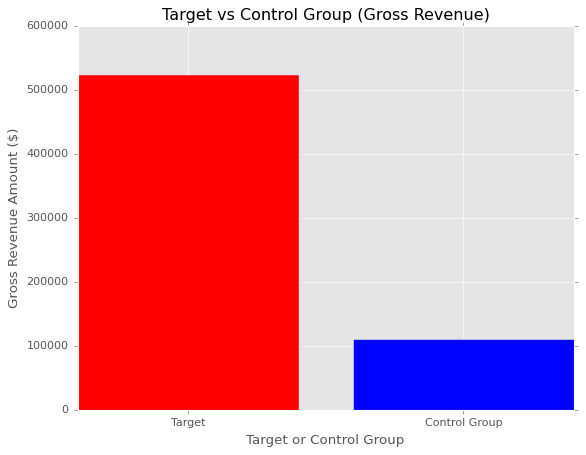

In [170]:
plt.style.use('ggplot')

x = ['Target', 'Control Group']
Gross_Revenue = [522682, 110761]

x_pos = [i for i, _ in enumerate(x)]

bar=plt.bar(x_pos, Gross_Revenue, color='blue')
plt.xlabel('Target or Control Group')
plt.ylabel('Gross Revenue Amount ($)')
plt.title('Target vs Control Group (Gross Revenue)')

plt.xticks(x_pos, x)

bar[0].set_color('r')

plt.show()

In [10]:
########### need to make last_12months_segment, target/cg numeric

In [26]:
# low, medium, high, ka, regnodep, no bet replaced with numeric value
# have to do this in order to run machine learning algorithms

df['last_12months_segment'] = df['last_12months_segment'].replace({'low': 0})
df['last_12months_segment'] = df['last_12months_segment'].replace({'medium': 1})
df['last_12months_segment'] = df['last_12months_segment'].replace({'high': 2})
df['last_12months_segment'] = df['last_12months_segment'].replace({'ka': 3})
df['last_12months_segment'] = df['last_12months_segment'].replace({'regnodep': 4})
df['last_12months_segment'] = df['last_12months_segment'].replace({'no bet': 5})

In [27]:
# change target and cg to numeric value

df['Target/CG'] = df['Target/CG'].replace({'Target': 1})
df['Target/CG'] = df['Target/CG'].replace({'Control Group': 0})

In [34]:
# new dataframe is created!

df.head()

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
0,1230877,2019-11-24,1104750.0,-49000.0,2,1,20
1,1230877,2019-11-26,596214.0,-30336.0,2,1,20
2,1230877,2019-11-13,465250.0,-36000.0,2,1,20
3,1230877,2019-11-01,437800.0,-20000.0,2,1,20
4,1276799,2019-02-24,435275.0,69825.0,3,1,50


In [35]:
# train/test/val split on data

train = df[df['date'] <= '2019-06-01']
val = df[(df['date'] == '2019-07-01') | (df['date'] == '2019-07-02') | (df['date'] == '2019-07-03')]
test = df[df['date'] >= '2019-08-01']

In [36]:
train.shape, val.shape, test.shape

((4422, 7), (88, 7), (5907, 7))

In [37]:
train.head()

,accountid,date,handle,grossrevenue,last_12months_segment,Target/CG,bonus
4,1276799,2019-02-24,435275.0,69825.0,3,1,50
18,1276799,2019-02-20,132054.0,436.0,3,1,50
22,1232188,2019-02-09,115408.0,7312.0,3,1,50
30,1230877,2019-03-05,81205.0,40.0,2,1,20
33,1230877,2019-03-17,67279.0,5750.0,2,1,20


In [38]:
# create features and compare them to the target aka gross revenue

features = ['handle', 'last_12months_segment', 'Target/CG', 'bonus']
target = 'grossrevenue'

In [39]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [40]:
# begin importing and running ML algorithms

%%capture
import sys

!pip install category_encoders==2.*
!pip install eli5
!pip install pdpbox
!pip install shap

In [41]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
# Fit Linear Regression Model
# Baseline
lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -4.055226194657899


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [43]:
from sklearn.linear_model import LinearRegression
# Instantiate model class
model = LinearRegression()

In [44]:
# Random Forest Regression Model
# Baseline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy -0.014685035111711818


In [45]:
# Instantiate one-hot encoder
encoder = ce.OneHotEncoder()

# Fit and transform on train/test sets
X_train1 = encoder.fit_transform(X_train)
X_test1 = encoder.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [46]:
# Instantiate model class
model = LinearRegression()
# Fit the model
model.fit(X_train1, y_train)
# Apply the model to new data
y_pred1 = model.predict(X_train1)
y_pred2 = model.predict(X_test1)

In [47]:
# xgboost

from xgboost import XGBRegressor

# Instantiate and fit one-hot encoder
encoder = ce.OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded  = encoder.fit_transform(X_test)

# Instantiate XGBRegressor and parameter tuning
model = XGBRegressor(
    n_estimators = 200,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)
# Instantiate eval_set
eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

# Fit model to the eval_set
model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='mae', 
          early_stopping_rounds=1000)

[20:25:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:167.192	validation_1-mae:230.498
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 1000 rounds.
[1]	validation_0-mae:158.91	validation_1-mae:245.488
[2]	validation_0-mae:150.627	validation_1-mae:257.793
[3]	validation_0-mae:146.4	validation_1-mae:267.258
[4]	validation_0-mae:139.928	validation_1-mae:273.728
[5]	validation_0-mae:135.54	validation_1-mae:279.463
[6]	validation_0-mae:133.517	validation_1-mae:283.838
[7]	validation_0-mae:131.677	validation_1-mae:287.868
[8]	validation_0-mae:127.428	validation_1-mae:289.487
[9]	validation_0-mae:124.901	validation_1-mae:292.181


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[10]	validation_0-mae:122.785	validation_1-mae:293.982
[11]	validation_0-mae:120.169	validation_1-mae:296.637
[12]	validation_0-mae:118.408	validation_1-mae:298.803
[13]	validation_0-mae:117.219	validation_1-mae:300.255
[14]	validation_0-mae:115.333	validation_1-mae:300.986
[15]	validation_0-mae:113.461	validation_1-mae:301.987
[16]	validation_0-mae:111.317	validation_1-mae:304.15
[17]	validation_0-mae:109.133	validation_1-mae:304.115
[18]	validation_0-mae:107.268	validation_1-mae:305.416
[19]	validation_0-mae:106.176	validation_1-mae:306.6
[20]	validation_0-mae:102.664	validation_1-mae:306.169
[21]	validation_0-mae:101.865	validation_1-mae:306.952
[22]	validation_0-mae:100.346	validation_1-mae:307.867
[23]	validation_0-mae:98.0368	validation_1-mae:307.905
[24]	validation_0-mae:96.0414	validation_1-mae:308.897
[25]	validation_0-mae:95.3677	validation_1-mae:309.451
[26]	validation_0-mae:93.4176	validation_1-mae:310.549
[27]	validation_0-mae:91.6855	validation_1-mae:311.394
[28]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
# Calculate r2 for the train and test data
y_pred1 = model.predict(X_train_encoded)
y_pred2 = model.predict(X_test_encoded)
r2 = r2_score(train[target], y_pred1)
print(f'The R2 of the training data is {r2}')
r2 = r2_score(test[target], y_pred2)
print(f'The R2 of the test data is {r2}')

The R2 of the training data is 0.3982574331580061
The R2 of the test data is -0.5363649253865046


In [49]:
import eli5
from eli5.sklearn import PermutationImportance
# Instantiate permuter for XGBRegressor
permuter = PermutationImportance(
    model,
    scoring='r2',
    n_iter=5,
    random_state=42
)
# Fit permuter to data from our model
permuter.fit(X_train_encoded, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.5,
                                             max_delta_step=0, max_depth=7,
                                             min_child_weight=1, missing=None,
                                             n_estimators=200, n_jobs=-1,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                      

In [50]:
# Pull out top features and their importance
feature_names = X_train_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

bonus                    0.001047
Target/CG                0.001784
last_12months_segment    0.006476
handle                   0.456682
dtype: float64

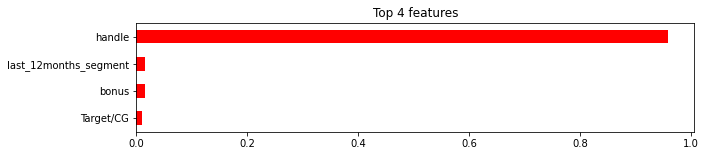

In [52]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='red');

In [53]:
# as seen from above, it appears the amount of money aka the handle has much more
# to do with gross revenue than any of the other two observed features

# based on the data obtained above, I would absolutely run this promo again
# it appears to be a success and the higher the handle, the bigger the revenue

# I would consider running this promo again and with even higher handles because
# based on the data, I believe the gross revenue would increase even more with
# higher handles